# Data Processing

### Table of Contents
<ul>
<li><a href="#ohe">One Hot Encoding</a></li>
<li><a href="#rfe">Recrussive Feature Elimation</a></li>
<li><a href="#dos">Data Oversampling</a></li>
<li><a href="#im">Implementing Models</a></li>
<li><a href="#conclusions">Summary</a></li>
</ul>

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('../Datasets/clean_dataset')

In [67]:
df.head(4)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,bmi_cat,Gcs,gcs_cat,age_cat,h1_pluse_P,heart_rate_cat,map_cat
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,Sepsis,Cardiovascular,0,normal,13.0,mild,old_adult,high,high,low
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,Respiratory,Respiratory,0,overweight,5.0,sever,old_adult,low,high,low
2,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,Neurological,Neurologic,0,overweight,15.0,normal,old_adult,normal,high,high
3,70.0,29.00,0,Caucasian,M,165.0,Accident & Emergency,admit,Med-Surg ICU,0.002083,...,Sepsis,Cardiovascular,0,overweight,15.0,normal,old_adult,normal,high,normal


In [68]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 84


> Most of these columns are repeatatives of other column  while some columns that start with d1_ are data recorded after 24 hours we are trying to predict patient survival in the first few hiurs of ICU admission inorder to priotise anad redeploy limited resources. 


In [69]:
df=df.drop(columns=['d1_diasbp_min', 'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min', 'd1_heartrate_max',
                    'd1_heartrate_min','d1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min'
                    , 'd1_resprate_max', 'd1_resprate_min','d1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
                    'd1_sysbp_min','d1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
                    'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min','h1_diasbp_max', 'h1_diasbp_min',
                    'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min','h1_heartrate_max', 
                    'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min','h1_mbp_noninvasive_max', 
                    'h1_mbp_noninvasive_min','h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max','h1_sysbp_min',
                    'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min','d1_glucose_max', 'd1_glucose_min',
                    'd1_potassium_max','d1_potassium_min','age','weight','height','apache_2_diagnosis',
                    'apache_2_bodysystem','intubated_apache','d1_diasbp_max','h1_resprate_max', 'h1_resprate_min',
                    'gcs_unable_apache','heart_rate_apache','Gcs','bmi','apache_post_operative','cirrhosis',
                    'apache_4a_hospital_death_prob','elective_surgery','resprate_apache','map_apache'])

In [70]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 26


<a name="ohe"></a>
## One Hot Encoding

In [71]:
cols=df.columns[(df.dtypes=='object') | (df.dtypes=='category')]
print(cols)
cat_col=df[cols]

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'bmi_cat', 'gcs_cat', 'age_cat', 'h1_pluse_P',
       'heart_rate_cat', 'map_cat'],
      dtype='object')


In [72]:
x=pd.get_dummies(cat_col) # convert categorical columns to dummies
df=df.drop(cols, axis=1) # drop original columns
df=df.join(x) #join dummies

In [73]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 70


<a home="rfe"></a>
## Recrussive Feature Elimation

In [74]:
X=df.drop('hospital_death', axis=1)
y=df['hospital_death']

In [75]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=16 )
rfe = rfe.fit(X,y)

In [78]:
rfe_in = rfe.get_support()
X=X[X.columns[rfe_in]]
X.columns

Index(['arf_apache', 'ventilated_apache', 'apache_4a_icu_death_prob',
       'hepatic_failure', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis',
       'icu_admit_source_Operating Room / Recovery',
       'icu_admit_source_Other ICU', 'apache_3j_bodysystem_Metabolic',
       'bmi_cat_underweight', 'gcs_cat_normal', 'age_cat_old_adult',
       'age_cat_young_adult', 'h1_pluse_P_low', 'heart_rate_cat_high'],
      dtype='object')

In [79]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.282789
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         hospital_death   No. Observations:                61123
Model:                          Logit   Df Residuals:                    61107
Method:                           MLE   Df Model:                           15
Date:                Thu, 09 Jun 2022   Pseudo R-squ.:                 0.05603
Time:                        17:22:24   Log-Likelihood:                -17285.
converged:                       True   LL-Null:                       -18311.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
arf_apache                                  

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

<a home="dos"></a>
## Data Oversampling

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train['hospital_death']=y_train
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = X_train[X_train['hospital_death']==0]
df_minority = X_train[X_train['hospital_death']==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=44611,    # to match majority class
                                 random_state=123) # reproducible results
X_train= pd.concat([df_majority, df_minority_upsampled])

In [83]:
y_train=X_train['hospital_death']
X_train=X_train.drop('hospital_death', axis=1)

<a home="im"></a>
## Implementing Models

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
lr=LogisticRegression()

In [85]:
rscv = RandomizedSearchCV(lr,parameters,scoring='roc_auc',cv=10)
lr_cv = rscv.fit(X_train,y_train)

In [86]:
print("best parameters: \n",lr_cv.best_params_)

best parameters: 
 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}


In [87]:
lr_pred = lr_cv.predict(X_test)

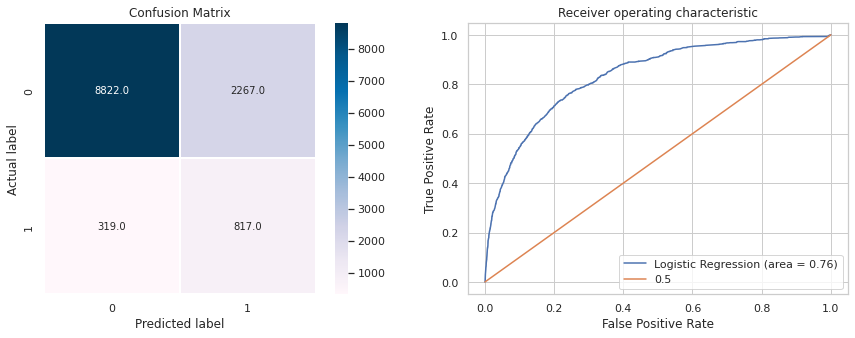

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))


ax1=plt.subplot(1, 2, 1)
confusion_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, lr_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_cv.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2, markers='r--',label=0.5)
# ax2.xlim([0.0, 1.0])
# sns.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax2.legend(loc="lower right");



In [90]:

print('classification_report for XGBOOSTER', '\n')
print(classification_report(y_test, lr_pred))

classification_report for XGBOOSTER 

              precision    recall  f1-score   support

           0       0.97      0.80      0.87     11089
           1       0.26      0.72      0.39      1136

    accuracy                           0.79     12225
   macro avg       0.62      0.76      0.63     12225
weighted avg       0.90      0.79      0.83     12225



In [61]:
cols=list(df.columns[df.dtypes=='object'])#catgorical columns
cat_col=df[cols]

In [62]:
x=pd.get_dummies(cat_col) # convert categorical columns to dummies
df=df.drop(cols, axis=1) # drop original columns
df=df.join(x) #join dummies

In [63]:
X = df.drop('hospital_death', axis=1) # saving predictors in X variable
y = df['hospital_death'] #saving target feature in y variable

In [64]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [65]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train) #using mutual infomation gain

In [66]:
mutual_info = pd.Series(mutual_info) #converts to pandas series
mutual_info.index = X_train.columns #set index as column
mutual_info.sort_values(ascending=False).head(11) #display top 5 in desc order

apache_4a_icu_death_prob         0.077533
apache_4a_hospital_death_prob    0.076826
apache_3j_diagnosis              0.037496
gcs_motor_apache                 0.036778
gcs_eyes_apache                  0.033951
gcs_verbal_apache                0.032462
apache_2_diagnosis               0.031854
d1_sysbp_noninvasive_min         0.025536
d1_sysbp_min                     0.024901
ventilated_apache                0.023795
d1_mbp_min                       0.022009
dtype: float64

In [67]:
# New train and test with 11 features
x=mutual_info.index[:11]
X_train=X_train[x]
X_test=X_test[x]

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [77]:
# for some reason scaling decrease accuracy and performance

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [79]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
lr=LogisticRegression()
gscv = RandomizedSearchCV(lr,parameters,scoring='roc_auc',cv=10)
logreg_cv = gscv.fit(X_train,y_train)

In [80]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
accuracy : 0.7744322836249955


In [81]:
y_pred = logreg_cv.predict(X_test) #predict on X test

Confusion Matrix 



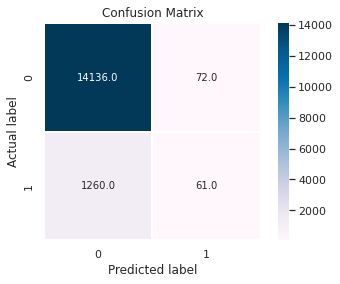

In [82]:
print("Confusion Matrix","\n")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

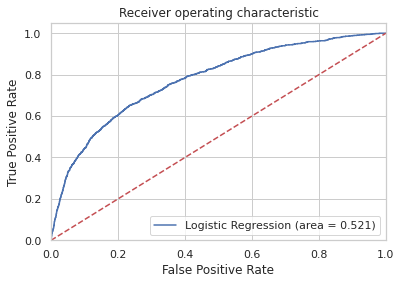

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [85]:
from sklearn import tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = tree.DecisionTreeClassifier()

In [86]:
rscv = RandomizedSearchCV(tree,parameters,scoring='roc_auc',cv=10,n_iter=10)
tree_cv = rscv.fit(X_train,y_train)
print("accuracy :",tree_cv.best_score_)

accuracy : 0.7718340844942113


In [87]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}


In [88]:
y_pred = tree_cv.predict(X_test) #predict on X test

Confusion Matrix 



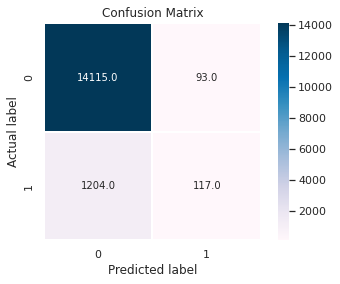

In [89]:
print("Confusion Matrix","\n")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

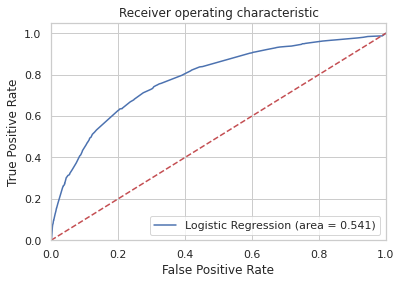

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, tree_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
plt.title('Receiver operating characteristic')

NameError: name 'tree_cv' is not defined

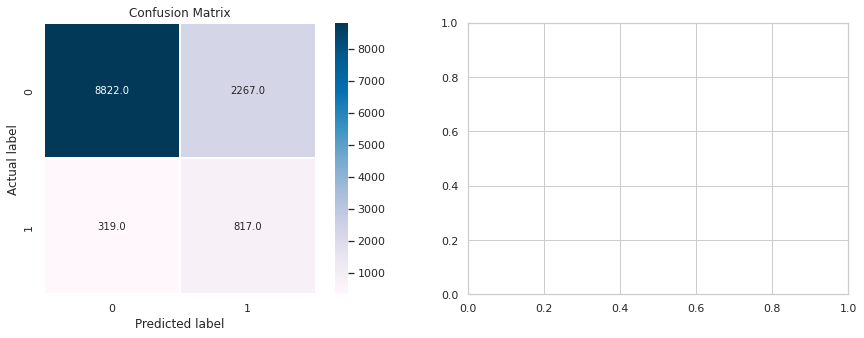

In [67]:
plt.figure(figsize=(15,5))


ax1=plt.subplot(1, 2, 1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, tree_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_cv.predict_proba(X_test)[:,1])
plt.figure()
ax2.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

